In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from gan.CGAN import CGanNet
import tensorflow_datasets as tfds
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Load and prepare dataset
(training_set, validation_set), dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test', 'validation'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
dataset_size = dataset_info.splits['test'].num_examples
print(f'Dataset size is: {dataset_size}')
num_classes = dataset_info.features['label'].num_classes
print(f'Number of different images class labels: {num_classes}')

Dataset size is: 6149
Number of different images class labels: 102


In [5]:
# Preprocessing images
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    # image = (image - 127.5) / 127.5 # Normalize [-1, 1]
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    return image, label

train_batches = training_set.shuffle(dataset_size//4).map(format_image)

get_label_name = dataset_info.features['label'].int2str
labels_strings = { _: get_label_name(_) for _ in range(num_classes) }

numpy_train_batches_images = np.array([_[0] for _ in train_batches])
numpy_train_batches_labels = np.array([_[1] for _ in train_batches])

In [6]:
print(f'Rozmiar labelek: {numpy_train_batches_labels.shape}')
print(f'Rozmiar obrazow: {numpy_train_batches_images.shape}')
print(f'Rozmiar jednego obrazu: {numpy_train_batches_images[0].shape}')

Rozmiar labelek: (6149,)
Rozmiar obrazow: (6149, 128, 128, 3)
Rozmiar jednego obrazu: (128, 128, 3)


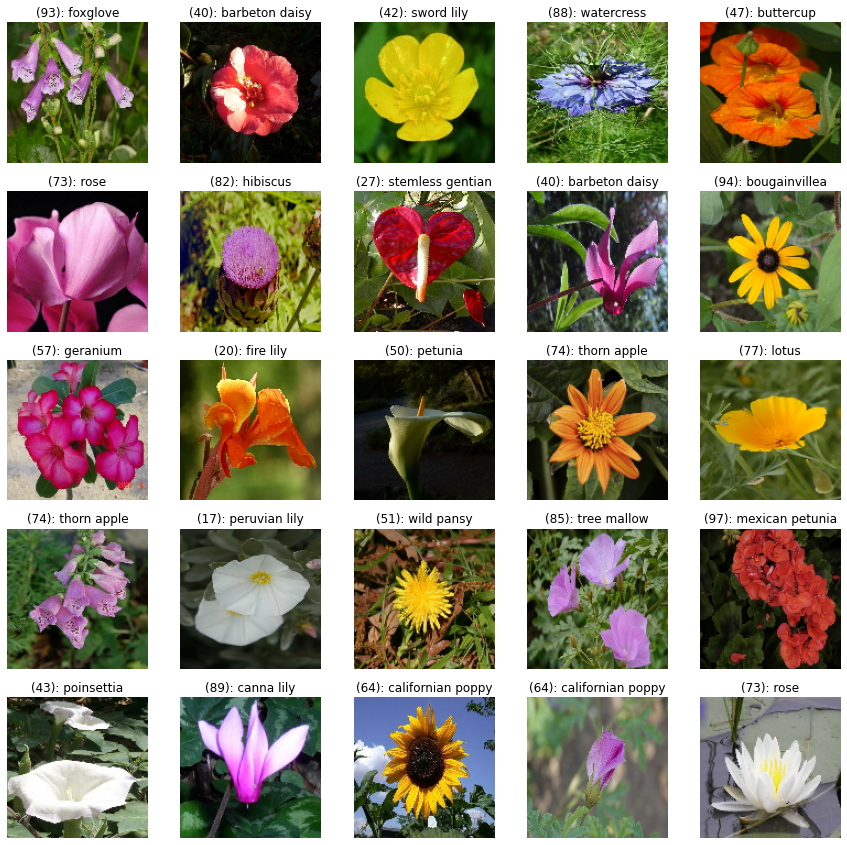

In [7]:
rows = 5
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
cnt = 0

for i in range(rows):
    for j in range(cols):
        image = numpy_train_batches_images[cnt, :, :, :]
       #  image = (image + 1) / 2.0
        image = np.clip(image, 0, 1)
        label = numpy_train_batches_labels[cnt]
        label_str = labels_strings[label]
        axs[i, j].set_title(f'({label}): {label_str}')
        axs[i, j].imshow(np.squeeze(image), cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
fig.set_facecolor('white')
plt.show()

In [8]:
cgan = CGanNet(batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=3,
          latent_dimension=100,
          training_data=numpy_train_batches_images,
          labels_data=numpy_train_batches_labels,
          number_of_classes=num_classes,
          labels_names = labels_strings
)

In [9]:
cgan.clear_files_structure()

In [10]:
cgan.define_discriminator()
tf.keras.utils.plot_model(cgan._discriminator, show_shapes=True, show_layer_names=True, dpi=400, to_file='disc.png')
cgan.define_generator()
tf.keras.utils.plot_model(cgan._generator, show_shapes=True, show_layer_names=True, dpi=400, to_file='generator.png')
cgan.define_gan()
tf.keras.utils.plot_model(cgan._gan, show_shapes=True, show_layer_names=True, dpi=400, to_file='cgan.png')
cgan.create_files_structure()

Dataset size: 6149
Batches per epoch: 40
Half batch size is: 16
----> Epoch: 0
40/40 [==============================] - 29s 533ms/step

D_real_loss: 0.15201309323310852 D_fake_loss: 0.5255213975906372 G_loss: 1.6877254247665405
D_real_acc: 0.9375 D_fake_acc: 0.875


----> Load epoch number: 0 from file .epoch


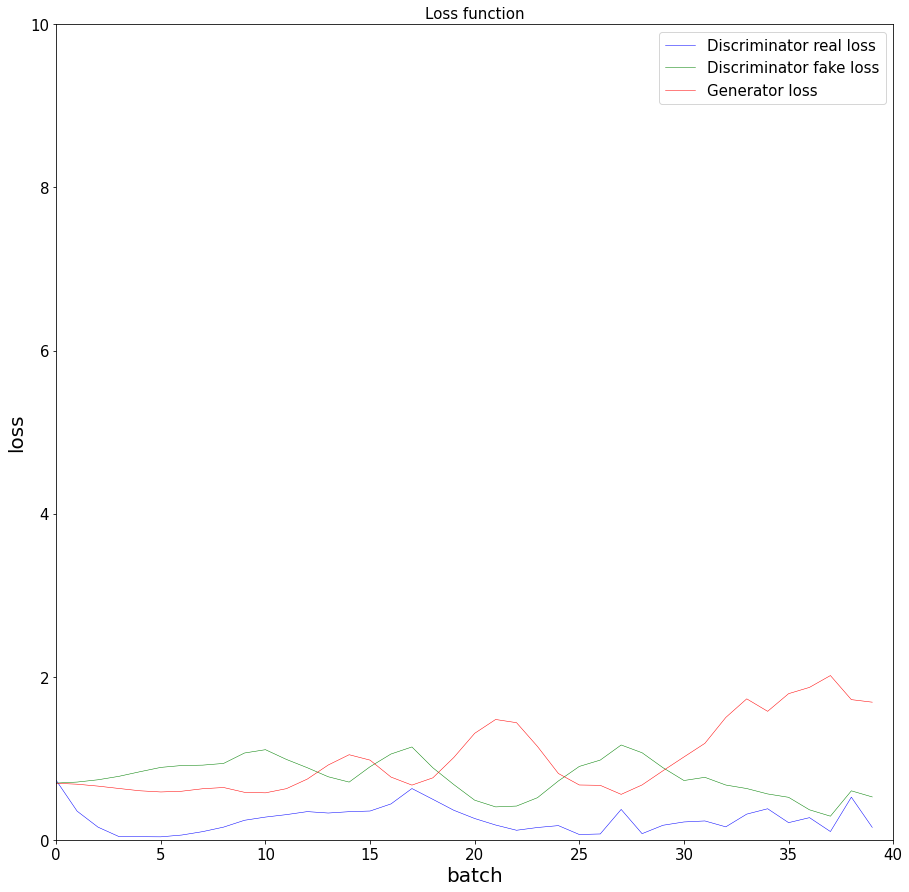

In [11]:
cgan.train(number_of_epochs=1, load_past_model=False)
cgan.plot_loss()

In [ ]:
cgan.train(number_of_epochs=100, load_past_model=True)
cgan.plot_loss()

Dataset size: 6149
Batches per epoch: 40
Half batch size is: 16
----> Load epoch number: 290 from file .epoch
----> Epoch: 291
40/40 [==============================] - 25s 620ms/step

D_real_loss: 0.6076998710632324 D_fake_loss: 0.6264995336532593 G_loss: 1.1102871894836426
D_real_acc: 0.625 D_fake_acc: 0.5625
----> Epoch: 292
40/40 [==============================] - 25s 626ms/step

D_real_loss: 0.6590244770050049 D_fake_loss: 0.5271519422531128 G_loss: 1.1411486864089966
D_real_acc: 0.625 D_fake_acc: 0.6875
----> Epoch: 293
40/40 [==============================] - 25s 620ms/step

D_real_loss: 0.5184246897697449 D_fake_loss: 0.5272024869918823 G_loss: 1.2877569198608398
D_real_acc: 0.8125 D_fake_acc: 0.8125
----> Epoch: 294
40/40 [==============================] - 25s 622ms/step

D_real_loss: 0.7517341375350952 D_fake_loss: 0.651222825050354 G_loss: 1.2232697010040283
D_real_acc: 0.5 D_fake_acc: 0.5625
----> Epoch: 295
40/40 [==============================] - 25s 628ms/step

D_real_los

In [ ]:
# cgan.load_model()

In [ ]:
cgan.show_sample_images()

In [ ]:
cgan.show_sample_image_one(label_num=30)